In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import boto3
from botocore.client import Config
import os
import pandas as pd
from io import StringIO
import matplotlib.dates as dates
from datetime import datetime
import matplotlib.ticker as ticker
from random import shuffle
from time import time
from pandas.plotting import register_matplotlib_converters
%matplotlib notebook

os.chdir('C:\\Users\\A Sua\\Documents\\AWS\\credentials')
list_of_lines = []
with open('capstoner_key.txt') as fp:
    lines = fp.readlines()
    for line in lines:
        line = line.strip()
        list_of_lines.append(line)
    fp.close()


location = list_of_lines[0].split('=')[1]
AWS_ACCESS_KEY_ID = list_of_lines[1].split('=')[1]
AWS_SECRET_ACCESS_KEY = list_of_lines[2].split('=')[1]
os.chdir('C:\\Users\\A Sua\\Documents\\FIU\\CAP2020')

In [3]:
register_matplotlib_converters()
%matplotlib notebook

### import dataframes

In [4]:
df_name_list = ['df_bidlo07_18', 'df_returns07_18', 'df_spread07_18', 'df_price07_18', 'df_askhi07_18']
df_list = []

In [5]:
### BUCKETS & KEYS
BUCKET_NAME = 'capstonefiu2020-data'
key_location = 'data/processed'

### ACTIVATE CLIENT
client = boto3.client('s3', 
              aws_access_key_id = AWS_ACCESS_KEY_ID,
               aws_secret_access_key=AWS_SECRET_ACCESS_KEY)


for name in df_name_list:
    file_name = '{}.csv'.format(name)
    key_path = key_location + '/' + file_name

    ### INSTANTIATE DATAFRAME
    csv_obj = client.get_object(Bucket = BUCKET_NAME, Key=key_path)
    body = csv_obj['Body']
    csv_string = body.read().decode('utf-8')

    temp_df = pd.read_csv(StringIO(csv_string))
    temp_df.index = temp_df['Unnamed: 0']
    temp_df = temp_df.drop('Unnamed: 0', axis=1)
    temp_df.index.names = ['date']


    #df_bidlo.head()
    #### TRANSPOSE DATA FOR EASE OF USE
    temp_df = temp_df.T
    temp_df.index = pd.to_datetime(temp_df.index)
    df_list.append(temp_df)
    print('{} added to df_list'.format(name))

df_bidlo07_18 added to df_list
df_returns07_18 added to df_list
df_spread07_18 added to df_list
df_price07_18 added to df_list
df_askhi07_18 added to df_list


In [6]:
df_bidlo = df_list[0]
df_returns = df_list[1]
df_spread = df_list[2]
df_price = df_list[3]
df_askhi = df_list[4]

In [7]:
#(df_bidlo >= df_askhi).sum().sort_values(ascending=False)

In [8]:
df_bottom_spread = df_price-df_bidlo
df_bss = df_bottom_spread/df_spread

In [9]:
#del df_list

In [10]:
#(df_bottom_spread > df_spread).to_csv('data\\external\\')

In [11]:
df_bss.head()

date,ORCL_ORACLE CORP,MSFT_MICROSOFT CORP,TROW_T ROWE PRICE GROUP INC,HON_HONEYWELL INTERNATIONAL INC,ADM_ARCHER DANIELS MIDLAND CO,FISV_FISERV INC,CERN_CERNER CORP,KO_COCA COLA CO,CDNS_CADENCE DESIGN SYSTEMS INC,ED_CONSOLIDATED EDISON INC,...,ROST_ROSS STORES INC,IPGP_I P G PHOTONICS CORP,UNH_UNITED HEALTHCARE,UA_UNDER ARMOUR INC,MKC_MCCORMICK & CO INC,LEN_LENNAR CORP,TAP_MOLSON COORS BREWING CO,STZ_CONSTELLATION BRANDS INC,CBS_CBS CORP,CMG_CHIPOTLE MEXICAN GRILL INC
2007-01-03,0.602941,0.541176,0.590164,0.271605,0.255319,0.311111,0.446809,0.500000,0.657895,0.465517,...,0.592040,0.661017,0.123762,0.285446,0.714286,0.672549,0.899598,0.968750,0.574713,0.884861
2007-01-04,0.666667,0.698113,0.773333,0.843373,0.695652,0.917219,0.981132,0.777778,0.659091,0.500000,...,0.675676,0.648649,0.905263,0.274136,0.448980,0.534431,0.097561,0.262000,0.625000,0.782524
2007-01-05,0.625000,0.633333,0.346939,0.439024,0.903846,0.480000,0.285714,0.225000,0.566667,0.313131,...,0.450549,0.704225,0.553571,0.571429,0.354839,0.872396,0.552632,0.400000,0.222222,0.871212
2007-01-08,0.854197,0.701754,0.919708,0.824324,0.917808,0.802198,0.243243,0.848485,0.676471,0.534884,...,0.829787,0.626374,0.866142,0.838983,0.754098,0.804196,0.572165,0.424242,1.000000,0.972222
2007-01-09,0.515152,0.511111,0.347826,0.863636,0.075000,0.597561,0.828571,0.405405,0.821429,0.679245,...,0.558824,0.967949,0.271739,0.837500,0.628571,0.899160,0.295000,0.371429,0.271186,0.829091


### Find the dates of the worst trading days systemically & by the company

In [12]:
dates = df_price.index
df_returns.columns[:5]

Index(['ORCL_ORACLE CORP', 'MSFT_MICROSOFT CORP',
       'TROW_T ROWE PRICE GROUP INC', 'HON_HONEYWELL INTERNATIONAL INC',
       'ADM_ARCHER DANIELS MIDLAND CO'],
      dtype='object', name='date')

#### RETURNS: 5 worst Return dates: DOW JONES, S&P

In [13]:
worst_dates_sp = pd.to_datetime(['2008-10-15', '2008-09-29', '2008-12-01', '2008-10-09', '2008-11-20'])
worst_dates_sp

DatetimeIndex(['2008-10-15', '2008-09-29', '2008-12-01', '2008-10-09',
               '2008-11-20'],
              dtype='datetime64[ns]', freq=None)

#### RETURNS: 5 worst Return dates: COMPNAY

In [14]:
worst_days_returns = {}
for symbol in df_returns.columns:
    temp_series = df_returns[symbol].sort_values(ascending=True).iloc[:5]
    worst_days_returns[symbol] = temp_series
worst_days_returns['ORCL_ORACLE CORP']

2011-12-21   -0.116558
2008-10-15   -0.098361
2013-03-21   -0.096882
2018-03-20   -0.094321
2013-06-21   -0.092593
Name: ORCL_ORACLE CORP, dtype: float64

### BS/S: 5 worst Return dates: COMPNAY

In [15]:
worst_days_bss = {}
for symbol in df_price.columns:
    temp_dic = worst_days_returns[symbol]
    temp_series = pd.merge(temp_dic, df_bss[symbol], left_index=True, right_index=True, copy=False, suffixes=('_x', ''))[symbol]
    worst_days_bss[symbol] = temp_series
worst_days_bss['ORCL_ORACLE CORP']

2011-12-21    0.796296
2008-10-15    0.005587
2013-03-21    0.157895
2018-03-20    0.469697
2013-06-21    0.180233
Name: ORCL_ORACLE CORP, dtype: float64

### BS/S: 5 worst Return dates: S&P

In [16]:
worst_days_bss_sp = {}
for symbol in df_price.columns:
    temp_series = pd.Series([df_bss[symbol][worst_dates_sp[i]] for i in range(len(worst_dates_sp))], index=[worst_dates_sp])
    worst_days_bss_sp[symbol] = temp_series

worst_days_bss_sp['HON_HONEYWELL INTERNATIONAL INC']

2008-10-15    0.111111
2008-09-29    0.250569
2008-12-01    0.069519
2008-10-09    0.144213
2008-11-20    0.127049
dtype: float64

### First 384 Timeseries Graphs









Batch 0


<IPython.core.display.Javascript object>


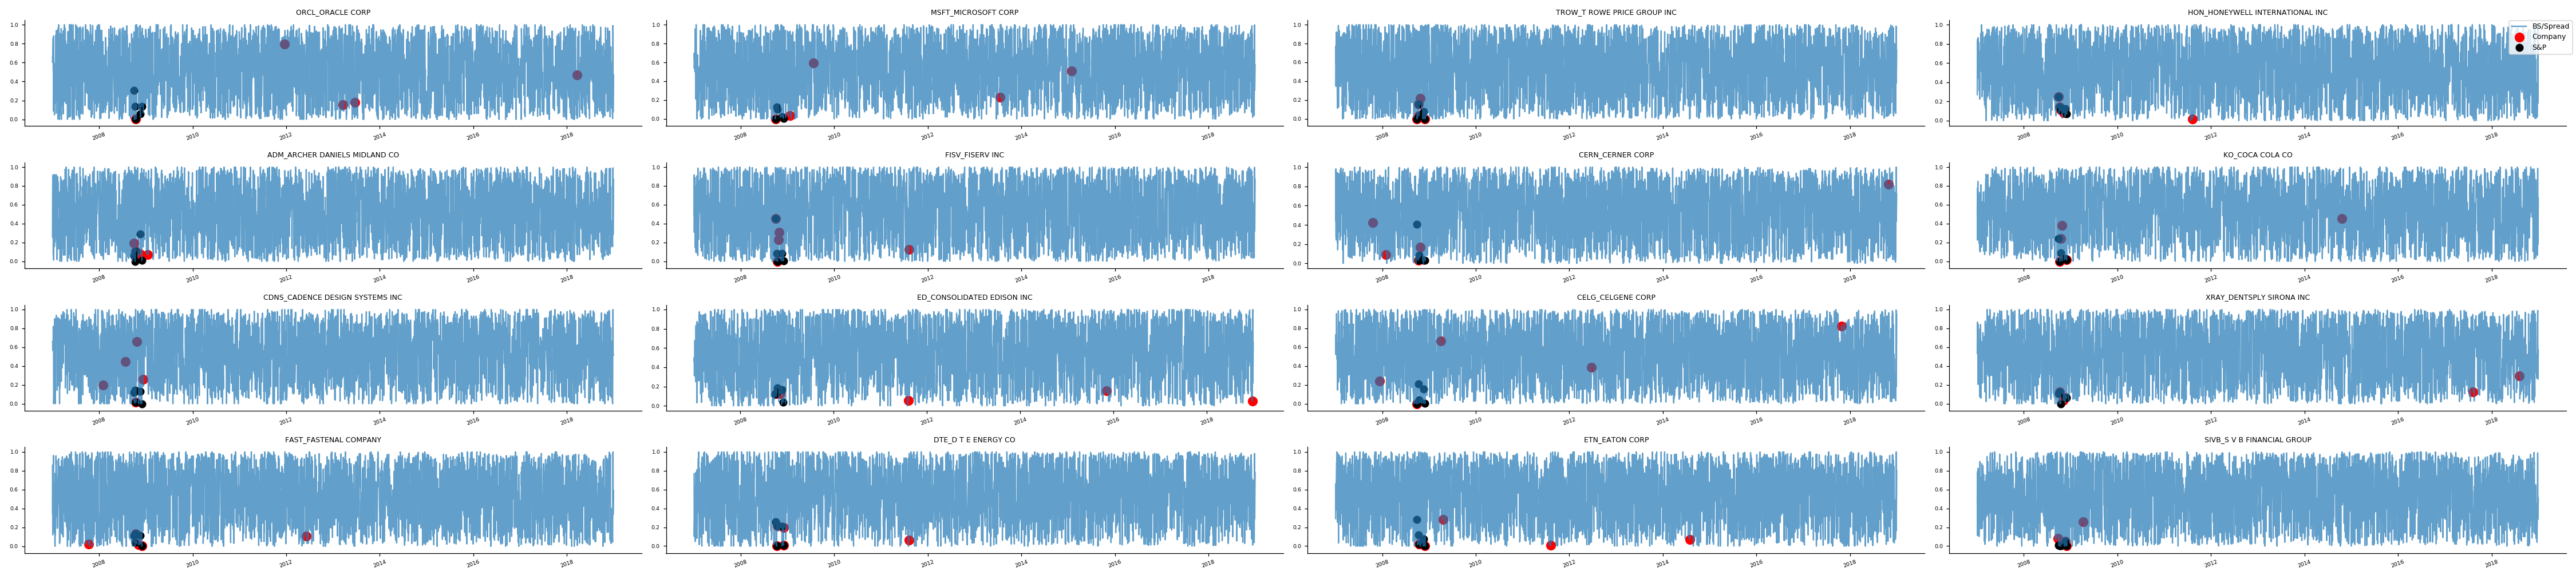

C:\PROGRA1\Anaconda3\lib\site-packages\ipykernel\__main__.py:86: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


In [17]:
#sup_title_font =15
sub_title_font =8
legend_font =8
axis_font = 6
tick_rotation = 20
black_dot = 3
blue_dot = 1
red_dot = 5


### matrix of subplots
n_cols = 4
n_rows = 4
n_plots = n_cols*n_rows
nloops = int(np.floor(388/n_plots))
temp_matrix = np.array(range(n_plots)).reshape(n_rows,n_cols)

for i in range(nloops):
    nn = len(df_price.columns)
    lower = i*n_plots
    upper = (i+1)*n_plots
    #print(lower, upper)
    temp_list = df_price.columns[lower:upper]
    print('\n\n\n\n\n\n\n\nBatch {}'.format(i))
    
    
    ####----PLOT THE FIGURES---------#####
    ### legend labels
    dot_labels = ['BS/Spread', 'Company', 'S&P']
    temp_list_of_axis = []
    
    ### instantiage
    fig, ax = plt.subplots(n_rows,n_cols,figsize=(40,9))
    for k in range(n_rows):
        for l in range(n_cols):
            ## indices
            temp_idx = temp_matrix[k,l]
            symbol = temp_list[temp_idx]
            ### company prices, worst 5 dates with worst returns
            temp_worst_bss = worst_days_bss[symbol]
            ### comapny returns, worst 5 DOW dates with worst returns
#             temp_worst_price_askhi_dow = worst_days_price_askhi_dow[symbol]
            ### comapny returns, worst 5 DOW dates with worst returns
            temp_worst_bss_sp = worst_days_bss_sp[symbol]

            ### Company Timeseries            
            wt = ax[k, l].plot(dates, df_bss[symbol].values, label='Daily BS/Spread'.format(symbol), alpha=0.7)            

            ### PLOT: 5 worst company dates
            wc = ax[k, l].scatter(temp_worst_bss.index, temp_worst_bss.values, 
                       color='red', 
                       linewidths=red_dot, 
                       edgecolor='red') 
                       #label='Worst Company Trading')
            ### PLOT: Returns on 5 worst DOW dates 
#             wm = ax[k,l].scatter(temp_worst_price_askhi_dow.index, temp_worst_price_askhi_dow.values, 
#                        color='black', 
#                        linewidths=black_dot, 
#                        edgecolor='black', marker='^') 
#                        #label='Worst Market Trading Days')            
            ### PLOT: Returns on 5 worst S&P dates 
            wm = ax[k,l].scatter(temp_worst_bss_sp.index, temp_worst_bss_sp.values, 
                       color='black', 
                       linewidths=black_dot, 
                       edgecolor='black') 
                       #label='Worst Market Trading Days')    


            ax[k,l].spines['top'].set_visible(False)
            ax[k,l].spines['right'].set_visible(False)
            ax[k,l].set_title(symbol, fontsize=sub_title_font) 
            #ax[k,l].set_xlabel(fontsize=x_axis_font)
            ax[k,l].tick_params(axis="x", labelsize=axis_font, rotation=tick_rotation)
            ax[k,l].tick_params(axis="y", labelsize=axis_font)
            #ax[k,l].set_ylim([0.7, 1.02])            
            temp_list_of_axis.append([wc, wm, wt])
         
            
            
    #fig.legend(bbox_to_anchor=(1.1, 1.1), prop={'size':15})
    #fig.suptitle('Daily Returns 2007-2018:\nBatch {}'.format(i), fontsize=sup_title_font)
    fig.subplots_adjust(hspace=0.7)
    leg = fig.legend(temp_list_of_axis, labels=dot_labels, 
               #title='Worst Trading Days', title_fontsize=25, 
               bbox_to_anchor=(1.0, 0.97), 
               prop={'size':legend_font})#, fontsize=sup_title_font)
    leg.set_in_layout(False)
    #plt.tight_layout(pad=0.5, w_pad=5.0, h_pad=0.0)
    plt.tight_layout()
    plt.show()
    break
    #plt.savefig('plots\\timeseries\\price_timeseries_batch{}.png'.format(i+1), dpi=220) 
        
#             for tick in ax[k, l].get_xticklabels():
#                 tick.set_rotation(20)
#                 tick.

### Leftovers









Batch 0


<IPython.core.display.Javascript object>


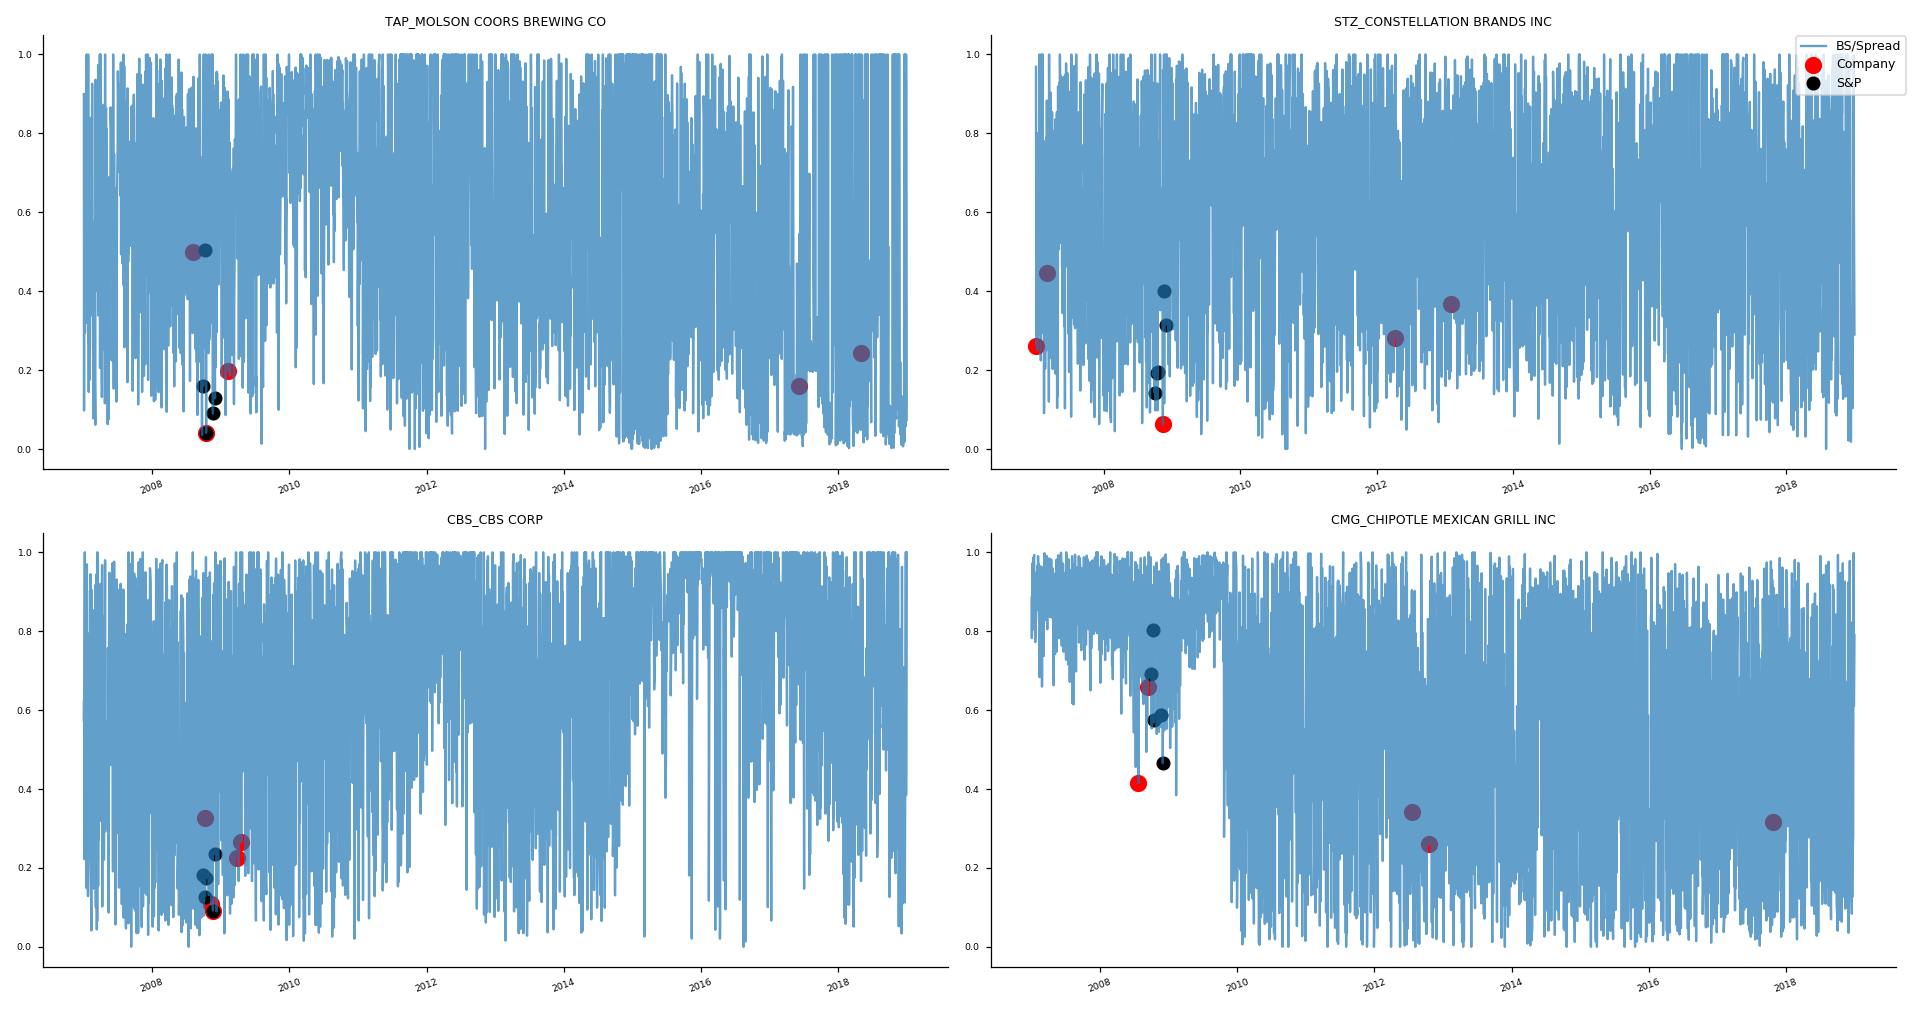

C:\PROGRA1\Anaconda3\lib\site-packages\ipykernel\__main__.py:80: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


In [18]:
#sup_title_font =15
sub_title_font =8
legend_font =8
axis_font = 6
tick_rotation = 20

### matrix of subplots
n_cols = 2
n_rows = 2
n_plots = n_cols*n_rows
nloops = 1
temp_matrix = np.array(range(n_plots)).reshape(n_rows,n_cols)

for i in range(nloops):
    nn = len(df_price.columns)
    #print(lower, upper)
    temp_list = df_returns.columns[-n_plots:]
    print('\n\n\n\n\n\n\n\nBatch {}'.format(i))
    
    
    ####----PLOT THE FIGURES---------#####
    ### legend labels
    dot_labels = ['BS/Spread', 'Company', 'S&P']
    temp_list_of_axis = []
    
    ### instantiage
    fig, ax = plt.subplots(n_rows,n_cols,figsize=(17,9))
    for k in range(n_rows):
        for l in range(n_cols):
            ## indices
            temp_idx = temp_matrix[k,l]
            symbol = temp_list[temp_idx]
            ### company prices, worst 5 dates with worst returns
            temp_worst_bss = worst_days_bss[symbol]
            ### comapny returns, worst 5 DOW dates with worst returns
#             temp_worst_price_askhi_dow = worst_days_price_askhi_dow[symbol]
            ### comapny returns, worst 5 DOW dates with worst returns
            temp_worst_bss_sp = worst_days_bss_sp[symbol]

            ### Company Timeseries            
            wt = ax[k, l].plot(dates, df_bss[symbol].values, label='Daily Price/Askhi'.format(symbol), alpha=0.7)            

            ### PLOT: 5 worst company dates
            wc = ax[k, l].scatter(temp_worst_bss.index, temp_worst_bss.values, 
                       color='red', 
                       linewidths=red_dot, 
                       edgecolor='red') 
                       #label='Worst Company Trading')
            ### PLOT: Returns on 5 worst DOW dates 
#             wm = ax[k,l].scatter(temp_worst_price_askhi_dow.index, temp_worst_price_askhi_dow.values, 
#                        color='black', 
#                        linewidths=black_dot, 
#                        edgecolor='black', marker='^') 
#                        #label='Worst Market Trading Days')            
            ### PLOT: Returns on 5 worst S&P dates 
            wm = ax[k,l].scatter(temp_worst_bss_sp.index, temp_worst_bss_sp.values, 
                       color='black', 
                       linewidths=black_dot, 
                       edgecolor='black') 
                       #label='Worst Market Trading Days')    


            ax[k,l].spines['top'].set_visible(False)
            ax[k,l].spines['right'].set_visible(False)
            ax[k,l].set_title(symbol, fontsize=sub_title_font) 
            #ax[k,l].set_xlabel(fontsize=x_axis_font)
            ax[k,l].tick_params(axis="x", labelsize=axis_font, rotation=tick_rotation)
            ax[k,l].tick_params(axis="y", labelsize=axis_font)
            #ax[k,l].set_ylim([0.7, 1.02])            
            temp_list_of_axis.append([wc, wm, wt])
         
            
            
    #fig.legend(bbox_to_anchor=(1.1, 1.1), prop={'size':15})
    #fig.suptitle('Daily Returns 2007-2018:\nBatch {}'.format(i), fontsize=sup_title_font)
    fig.subplots_adjust(hspace=0.7)
    leg = fig.legend(temp_list_of_axis, labels=dot_labels, 
               #title='Worst Trading Days', title_fontsize=25, 
               bbox_to_anchor=(1.0, 0.97), 
               prop={'size':legend_font})#, fontsize=sup_title_font)
    leg.set_in_layout(False)
    #plt.tight_layout(pad=0.5, w_pad=5.0, h_pad=0.0)
    plt.tight_layout()
    plt.show()
    break
    #plt.savefig('plots\\timeseries\\price_timeseries_batch{}.png'.format(i+1), dpi=220) 
        
#             for tick in ax[k, l].get_xticklabels():
#                 tick.set_rotation(20)
#                 tick.